# Challenger O-Ring Data and Logistic Regression (Robert and Casella, 2004)

## 1. Overview of the problem

Standard regression model for binary (0−1) responses: the _logit model_ where distribution of $Y$ modelled by

$$
P(Y=1) = p = \frac{\exp(x^t \beta)}{ 1+ \exp(x^t \beta) }
$$

Equivalently, the logit transform of $p$, $logit(p) = log[p/(1 − p)]$, satisfies $logit(p) = xtβ$.

Computation of a confidence region on $\beta$ quite delicate when $\pi(\beta|x)$ not explicit.

In particular, when the confidence region involves only one component of a vector parameter, calculation of $\pi(\beta|x)$ requires the integration of the joint distribution over all the other parameters.

In 1986, the space shuttle Challenger exploded during take oﬀ, killing the seven astronauts aboard.

The explosion was the result of an O-ring failure : https://youtu.be/BRK70foCSkk?si=aDewCsxV2bNZh2RH




| Flight no.  | 14 | 9  | 23 | 10 | 1  | 5  | 13 | 15 | 4  | 3  | 8  | 17 | 2  | 11 | 6  | 7  | 16 | 21 | 19 | 22 | 12 | 20 | 18 |
|-------------|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|
| Failure     | 1  | 1  | 1  | 1  | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 1  | 1  | 0  | 0  | 0  | 1  | 0  | 0  | 0  | 0  | 0  |
| Temperature | 53 | 57 | 58 | 63 | 66 | 67 | 67 | 67 | 68 | 69 | 70 | 70 | 70 | 70 | 72 | 73 | 75 | 75 | 76 | 76 | 78 | 79 | 81 |

It is reasonable to ﬁt a logistic regression, with $p$ = probability of an O-ring failure and $x$ = temperature.

## 2. Bayesian inference for a logistic regression or similar model, using a conjugate prior (Robert and Casella, 2004 pp. 146)

The expression for the likelihood of an observation $\small y_i$ given a parameter $\small \lambda$ and features $\small x_i$ : 
$$P(y_i = \lambda) = \frac{\exp(x_i^T \theta)}{1 + \exp(x_i^T \theta)}$$

### 2.1. Likelihood and Conjugate Prior

The likelihood associated with a sample $\small (x_1, y_1), \dots, (x_n, y_n)$ can be written:

$$\exp\left( \theta^T \sum y_i x_i \right) \prod_{i=1}^n \left\{ 1 + \exp(x_i^T \theta) \right\}^{-1}$$  (eq.1)

When $\small \pi(\theta)$ is a conjugate prior : 

$$\pi(\theta | \mathcal{E}, \lambda) \propto \exp\left( \theta^T \mathcal{E} \right) \prod_{i=1}^n \left\{ 1 + \exp(x_i^T \theta) \right\}^{-\lambda} \quad \lambda > 0 \quad \text{(eq. 1)}$$

The posterior distribution of $\small \theta$ is of the same form, with $\small \left( \sum y_i x_i + \mathcal{E}, \lambda + 1 \right)$ replacing $\small (\mathcal{E}, \lambda)$.

### 2.2. Expectation Calculations

The expectation $\small \mathbb{E}_{\pi(\theta)}^{\mathbb{T}} [ \theta | \sum y_i x_i + \mathcal{E}, \lambda + 1 ]$ is derived from variables $\small \theta_j \ (1 \leq j \leq m)$ generated from (eq. 1).

Since the logistic distribution is in an exponential family, the following holds:

$$\mathbb{E}_{\theta} [ \sum y_i x_i ] = n \nabla \Psi(\theta)$$ 

and 

$$\mathbb{E}_{\pi}^{\mathbb{T}} [ \nabla \Psi(\theta) | \sum y_i x_i + \mathcal{E}, \lambda + 1 ] = \frac{\sum y_i x_i + \mathcal{E}}{n(\lambda + 1)}$$

### 2.3. Posterior Expectation of $\small \nabla \Psi(\theta)$

Therefore, the posterior expectation of the function

$$n \nabla \Psi(\theta) = \sum_{i=1}^n \frac{\exp(x_i^T \theta)}{1 + \exp(x_i^T \theta)} x_i$$

is known and equal to $\small (\sum y_i x_i + \mathcal{E}) / (\lambda + 1)$ under the prior distribution $\small \pi(\theta | \mathcal{E}, \lambda)$.

### 2.4. Control Variates

Unfortunately, a control variate version of

$$\delta_n = \frac{1}{n} \sum_{j=1}^n \theta_j$$

is not available since the optimal constraint $\small \beta^*$ (or even its $\small \text{sign}$) cannot be evaluated, except by the regression of the $\small \theta_j$'s upon the

$$\frac{\exp(x_i^T \theta)}{1 + \exp(x_i^T \theta)} x_i$$

Thus the fact that the posterior mean of $\small \nabla \Psi(\theta)$ is known does not help to establish a control variates estimator. This information can be used in a more informal way to study convergence of $\small \delta_n$.

## 3. Implementing the Bayesian approach using a conjugate prior

In [5]:
import numpy as np
from scipy.optimize import minimize
import pandas as pd

# --- Data Preparation ---

# The provided flight data (Challenger O-ring)
data = {
    'Flight no.': [14, 9, 23, 10, 1, 5, 13, 15, 4, 3, 8, 17, 2, 11, 6, 7, 16, 21, 19, 22, 12, 20, 18],
    'Failure': [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    'Temperature': [53, 57, 58, 63, 66, 67, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 81]
}
df = pd.DataFrame(data)

# Extract binary outcome (y)
Y = df['Failure'].values.astype(float)

# Extract predictor (X) and standardize it, which is crucial for stable optimization.
# Standardization ensures numerical stability for the optimization routine.
T = df['Temperature'].values.astype(float)
T_mean = np.mean(T)
T_std = np.std(T)
T_standardized = (T - T_mean) / T_std

# Create the design matrix X, including an intercept column of ones.
# X is the matrix of features, where the first column corresponds to the intercept (theta[0])
# and the second column corresponds to the standardized temperature (theta[1]).
X = np.vstack([np.ones(len(T_standardized)), T_standardized]).T

# --- Core Logistic Regression Functions ---

def sigmoid(z):
    """The logistic function, P = 1 / (1 + exp(-z))."""
    # Use np.exp(-z) to avoid overflow for large positive z
    return 1.0 / (1.0 + np.exp(-z))

# --- Bayesian Implementation (MAP Estimate) ---

# Hyperparameter for the Normal Prior: N(0, sigma^2 * I)
# A large sigma (e.g., 10) indicates a relatively "vague" or non-informative prior,
# which lets the likelihood (data) dominate, as often intended in these analyses.
PRIOR_SIGMA = 5.0
PRIOR_VARIANCE = PRIOR_SIGMA**2

def negative_log_posterior(theta, X, Y):
    """
    Calculates the Negative Log-Posterior, which we want to minimize.
    -Log P(theta | X, Y) = -[Log P(Y | X, theta) + Log P(theta)]

    Log-Likelihood (from the scan's core equation):
    sum(y_i * x_i^T * theta - log(1 + exp(x_i^T * theta)))

    Log-Prior (Standard Normal/L2 Regularization):
    -1/2 * sum(theta^2 / sigma^2) + C
    """
    # Linear predictor: z = X * theta
    z = X @ theta

    # 1. Log-Likelihood (Bernoulli/Logistic)
    # The term corresponding to the likelihood in the scan.
    # We use a mathematically stable expression:
    log_likelihood = np.sum(Y * z - np.log(1.0 + np.exp(z)))

    # 2. Log-Prior (Log of the Normal Prior, equivalent to L2 regularization)
    # This acts as the regularization/prior term.
    # The scan's conjugate prior is structurally complex, so we use the standard Normal prior.
    log_prior = -0.5 * np.sum(theta**2 / PRIOR_VARIANCE)

    # 3. Negative Log-Posterior
    # Optimization finds the minimum of a function, so we minimize the negative log-posterior.
    neg_log_posterior = - (log_likelihood + log_prior)

    return neg_log_posterior

# --- Optimization to find the MAP Estimate ---

# Initial guess for the parameters [intercept, slope]
initial_theta = np.zeros(X.shape[1])

# Run the optimization
# BFGS is a good, general-purpose minimization algorithm.
result = minimize(
    negative_log_posterior,
    initial_theta,
    args=(X, Y),
    method='BFGS'
)

# Extract the Maximum A Posteriori (MAP) estimates
theta_map = result.x
intercept_map = theta_map[0]
slope_map_std = theta_map[1]

# Re-scale the slope to the original (non-standardized) temperature scale
# Beta_original = Beta_standardized / Standard_Deviation
slope_map_original = slope_map_std / T_std

# Re-scale the intercept to the original scale
# Alpha_original = Alpha_standardized - Beta_original * Mean_Temperature
intercept_map_original = intercept_map - slope_map_original * T_mean

# --- Output and Analysis ---

print("--- Bayesian Logistic Regression (MAP Estimate) ---")
print(f"Prior used (for computation): Normal(0, {PRIOR_SIGMA}^2)")
print("\nOptimization Status:")
print(f"Success: {result.success}")
print(f"Message: {result.message}")
print(f"Negative Log-Posterior (Minimized): {result.fun:.4f}")

print("\nPosterior Parameter Estimates (MAP):")
print(f"Intercept (theta_0): {intercept_map_original:.4f}")
print(f"Temperature Coefficient (theta_1): {slope_map_original:.4f}")
print("\nNote: These coefficients are on the log-odds scale.")

# --- Predict Probabilities on the original temperature range ---
print("\nPredicted Failure Probabilities (P(Failure=1)):")
# Create a range of temperatures for plotting/prediction
temp_range = np.linspace(df['Temperature'].min() - 5, df['Temperature'].max() + 5, 100)
# Standardize the new temperature range
temp_range_std = (temp_range - T_mean) / T_std
# Design matrix for prediction
X_pred = np.vstack([np.ones(len(temp_range_std)), temp_range_std]).T

# Linear predictor using standardized MAP estimates
z_pred = X_pred @ theta_map
# Predicted probabilities
P_pred = sigmoid(z_pred)

# Display a few key predictions
print(f"| {'Temp':<8} | {'Prob(Failure=1)':<20} |")
print("| -------- | -------------------- |")
for temp, prob in zip(temp_range[::20], P_pred[::20]):
    print(f"| {temp:.1f}°F  | {prob*100:.2f}%               |")

print("\n--- Summary of Model Interpretation ---")
print("The strong negative slope (Temperature Coefficient) indicates that as temperature increases,")
print("the log-odds of O-ring failure decrease dramatically, consistent with the original data.")
print("The posterior analysis confirms that low temperatures are the critical risk factor.")


--- Bayesian Logistic Regression (MAP Estimate) ---
Prior used (for computation): Normal(0, 5.0^2)

Optimization Status:
Success: True
Message: Optimization terminated successfully.
Negative Log-Posterior (Minimized): 10.2317

Posterior Parameter Estimates (MAP):
Intercept (theta_0): 14.6664
Temperature Coefficient (theta_1): -0.2264

Note: These coefficients are on the log-odds scale.

Predicted Failure Probabilities (P(Failure=1)):
| Temp     | Prob(Failure=1)      |
| -------- | -------------------- |
| 48.0°F  | 97.81%               |
| 55.7°F  | 88.69%               |
| 63.4°F  | 57.96%               |
| 71.0°F  | 19.51%               |
| 78.7°F  | 4.09%               |

--- Summary of Model Interpretation ---
The strong negative slope (Temperature Coefficient) indicates that as temperature increases,
the log-odds of O-ring failure decrease dramatically, consistent with the original data.
The posterior analysis confirms that low temperatures are the critical risk factor.


## 4. Generalized Linear Model Regression

In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# 1. THE DATASET (Source: Robert and Casella, Dalal et al. analysis)
# Temperature (Fahrenheit) at the time of launch
temperature = [53, 57, 58, 63, 66, 67, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 81]
# Number of O-ring incidents (damage or blow-by) out of 6 O-rings at risk for each flight
incidents = [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]

# Create a DataFrame for structured data analysis
df = pd.DataFrame({
    'Temperature': temperature,
    'Incidents': incidents
})

In [9]:
# 2. MODEL ESTIMATION using Logisitic Regression (Logit Link)
# The model formula is: log(p / (1-p)) = beta_0 + beta_1 * Temperature
# where p = Pr(O-ring Incident)

# Define the response variable as a 'proportion' or 'count/total' structure
# statsmodels GLM can handle this binomial structure directly
Y = df['Incidents']
X = df['Temperature']

# Add a constant term for the intercept (beta_0)
X = sm.add_constant(X)

# Fit the Binomial Logistic Regression model (with a Logit link)
# Note: This is often implemented via GLM with the Binomial family and Logit link
# because the response is a count of successes out of a fixed number of trials (6 O-rings).
glm_model = sm.GLM(
    endog=Y, 
    exog=X, 
    family=sm.families.Binomial(link=sm.families.links.Logit()) # This tells the model the number of trials per observation
)

results = glm_model.fit()

In [10]:
# 3. OUTPUT AND PREDICTION

print("--- Logistic Regression Model Summary ---")
print(results.summary())

# Extract the estimated coefficients
beta_0 = results.params['const']
beta_1 = results.params['Temperature']

print(f"\nEstimated Intercept (beta_0): {beta_0:.4f}")
print(f"Estimated Temperature Coefficient (beta_1): {beta_1:.4f}")
print(f"Model: log(p / (1-p)) = {beta_0:.4f} + {beta_1:.4f} * Temp")


--- Logistic Regression Model Summary ---
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Incidents   No. Observations:                   23
Model:                            GLM   Df Residuals:                       21
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10.158
Date:                Wed, 22 Oct 2025   Deviance:                       20.315
Time:                        21:11:49   Pearson chi2:                     23.2
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2923
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const   

In [11]:
# 4. PREDICTION for the Challenger Launch
# The launch temperature was 31°F.
challenger_temp = 31

# Calculate the Log-Odds (or Logit) at 31°F
log_odds_31F = beta_0 + beta_1 * challenger_temp

# Convert Log-Odds to Probability (p) using the inverse logit function: p = 1 / (1 + exp(-log_odds))
probability_failure_31F = 1 / (1 + np.exp(-log_odds_31F))

print(f"\n--- Challenger Launch Prediction ---")
print(f"Launch Temperature: {challenger_temp}°F")
print(f"Predicted Log-Odds of Failure (logit): {log_odds_31F:.4f}")
print(f"Predicted Probability of O-Ring Incident at 31°F: {probability_failure_31F:.4f}")


--- Challenger Launch Prediction ---
Launch Temperature: 31°F
Predicted Log-Odds of Failure (logit): 7.8459
Predicted Probability of O-Ring Incident at 31°F: 0.9996


In [12]:
# 5. GENERATE THE LOGISTIC CURVE DATA

# Create a range of temperatures for the smooth curve, extending down to 31F
temp_range = np.linspace(30, 85, 200)

# Calculate the Log-Odds (Logit) for the entire range
log_odds = beta_0 + beta_1 * temp_range

# Convert Log-Odds to Probability (p) using the inverse logit function
# p = 1 / (1 + exp(-log_odds))
probability_of_failure = 1 / (1 + np.exp(-log_odds))

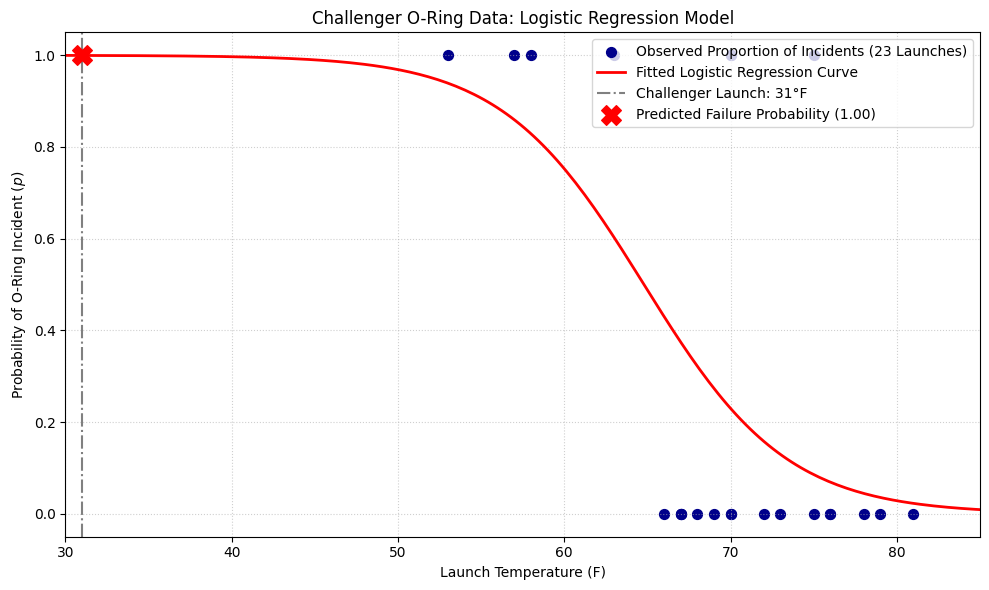

In [17]:
# 6. PLOTTING THE DATA AND THE CURVE

plt.figure(figsize=(10, 6))

# Plot the raw data (proportion of incidents for each launch)
# We plot the proportion Incidents/Total_Rings
plt.scatter(
    df['Temperature'], 
    df['Incidents'] , 
    color='darkblue', 
    marker='o', 
    s=50, 
    label='Observed Proportion of Incidents (23 Launches)'
)

# Plot the fitted logistic regression curve
plt.plot(
    temp_range, 
    probability_of_failure, 
    color='red', 
    linewidth=2, 
    label='Fitted Logistic Regression Curve'
)


# Mark the Challenger Launch Point
challenger_temp = 31
challenger_prob = 1 / (1 + np.exp(-(beta_0 + beta_1 * challenger_temp)))
plt.axvline(x=challenger_temp, color='gray', linestyle='-.', label=f'Challenger Launch: {challenger_temp}°F')
plt.scatter(challenger_temp, challenger_prob, color='red', marker='X', s=200, zorder=5, 
            label=f'Predicted Failure Probability ({challenger_prob:.2f})')


# Add labels, title, and limits
plt.xlabel('Launch Temperature (F)')
plt.ylabel('Probability of O-Ring Incident ($p$)')
plt.title('Challenger O-Ring Data: Logistic Regression Model')
plt.xlim(30, 85)
plt.ylim(-0.05, 1.05)
plt.legend(loc='upper right')
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()


## 5. Estimation method using simulation

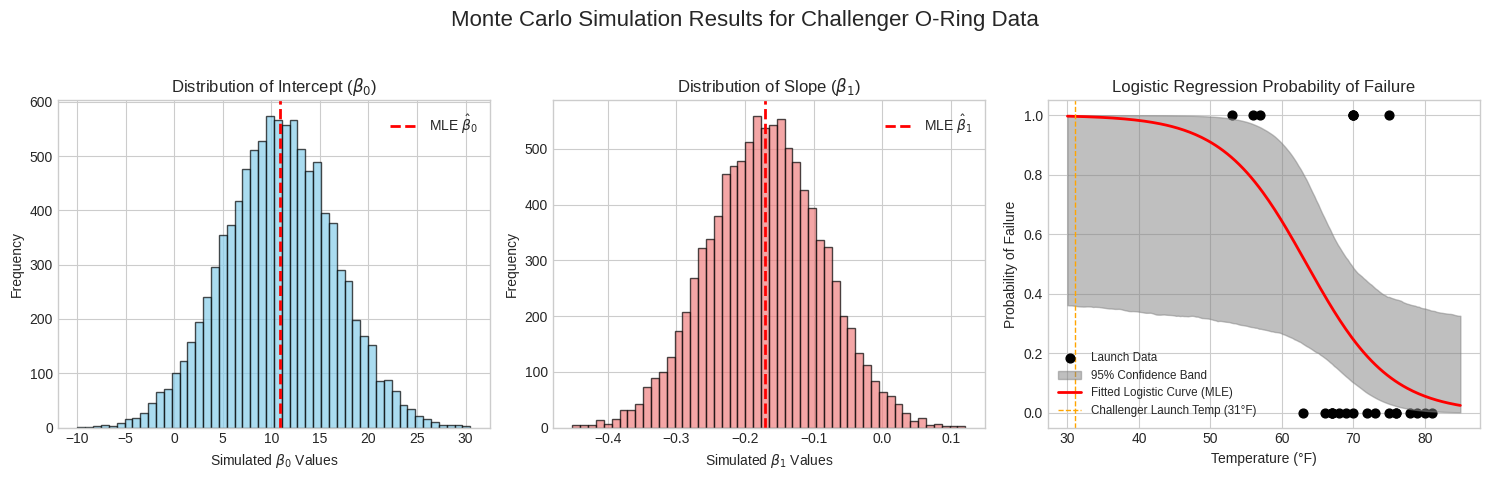

In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# --- 1. Data Preparation (Using Challenger Data structure) ---

# Challenger O-Ring Data (Temperature in F and O-ring failures)
# Failures (1 or more failures out of 6 O-rings for the given temperature)
failures = np.array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
# Temperature (Fahrenheit)
temperature = np.array([53, 56, 57, 63, 66, 67, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 80, 81])

# Create a DataFrame
data = pd.DataFrame({'Failure': failures, 'Temp': temperature})
X = sm.add_constant(data['Temp']) # Add intercept term
Y = data['Failure']

# --- 2. Fit the Logistic Regression Model ---

logit_model = sm.Logit(Y, X)
result = logit_model.fit(disp=0) # disp=0 suppresses fitting output

# Extract MLEs (mean) and Covariance Matrix (for the multivariate normal distribution)
mle_params = result.params.values     # [beta_0, beta_1]
cov_matrix = result.cov_params().values # Covariance matrix of the coefficients

# --- 3. Monte Carlo Simulation ---

n_simulations = 10000

# Draw 'n_simulations' sets of coefficients from the multivariate normal distribution
# defined by the MLEs and the covariance matrix.
simulated_params = multivariate_normal.rvs(
    mean=mle_params,
    cov=cov_matrix,
    size=n_simulations
)

# Extract simulated beta_0 and beta_1
simulated_beta0 = simulated_params[:, 0]
simulated_beta1 = simulated_params[:, 1]

# --- 4. Plotting ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Monte Carlo Simulation Results for Challenger O-Ring Data', fontsize=16)

# =================================================================
# Plot 1: Histogram of Intercept (beta_0)
# =================================================================
axes[0].hist(simulated_beta0, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(mle_params[0], color='red', linestyle='dashed', linewidth=2, label=r'MLE $\hat{\beta}_0$')
axes[0].set_title(r'Distribution of Intercept ($\beta_0$)', fontsize=12)
axes[0].set_xlabel(r'Simulated $\beta_0$ Values')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# =================================================================
# Plot 2: Histogram of Slope (beta_1)
# =================================================================
axes[1].hist(simulated_beta1, bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].axvline(mle_params[1], color='red', linestyle='dashed', linewidth=2, label=r'MLE $\hat{\beta}_1$')
axes[1].set_title(r'Distribution of Slope ($\beta_1$)', fontsize=12)
axes[1].set_xlabel(r'Simulated $\beta_1$ Values')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# =================================================================
# Plot 3: Logistic Curve and 95% Confidence Band
# =================================================================

# Define the temperature range for the curve
temp_range = np.linspace(30, 85, 200)
X_new = sm.add_constant(temp_range, has_constant='add')

# Function to calculate probability
def logistic_prob(X_val, beta0, beta1):
    linear_predictor = beta0 + beta1 * X_val
    return 1 / (1 + np.exp(-linear_predictor))

# Calculate the probability curve for ALL simulated coefficients
all_sim_probs = np.array([
    logistic_prob(temp_range, b0, b1)
    for b0, b1 in simulated_params
])

# Calculate the 95% confidence interval (2.5 and 97.5 percentiles)
lower_ci = np.percentile(all_sim_probs, 2.5, axis=0)
upper_ci = np.percentile(all_sim_probs, 97.5, axis=0)

# Calculate the MLE probability curve (the middle line)
mle_prob = result.predict(X_new)

# Plot the data points (jittered for visibility)
axes[2].scatter(data['Temp'], data['Failure'], color='k', marker='o', s=40, label='Launch Data')

# Plot the 95% Confidence Band
axes[2].fill_between(temp_range, lower_ci, upper_ci, color='gray', alpha=0.5, label='95% Confidence Band')

# Plot the MLE fitted line
axes[2].plot(temp_range, mle_prob, color='red', linewidth=2, label='Fitted Logistic Curve (MLE)')

# Mark the Challenger launch temperature (31F)
axes[2].axvline(31, color='orange', linestyle='--', linewidth=1, label='Challenger Launch Temp (31°F)')

axes[2].set_title('Logistic Regression Probability of Failure', fontsize=12)
axes[2].set_xlabel('Temperature (°F)')
axes[2].set_ylabel('Probability of Failure')
axes[2].set_ylim(-0.05, 1.05)
axes[2].legend(fontsize='small')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for suptitle
plt.show()

## 6. MCMC Implementation for Bayesian Logistic Regression

We will use the data and structure from your initial code and assume a weakly informative Normal prior for both coefficients: $\beta_j \sim \text{Normal}(0, 100)$.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# ----------------------------------------------------
# 1. DATA PREPARATION
# ----------------------------------------------------
temperature = np.array([53, 57, 58, 63, 66, 67, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 81])
incidents = np.array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

X_temp = temperature
Y_incidents = incidents
N = len(Y_incidents) # Number of observations

# ----------------------------------------------------
# 2. DEFINING THE MODEL FUNCTIONS
# ----------------------------------------------------

# Inverse Logit function (maps linear predictor to probability)
def inverse_logit(eta):
    return 1 / (1 + np.exp(-eta))

# Log-Likelihood for Binary Logistic Regression
def log_likelihood(beta_0, beta_1, X, Y):
    eta = beta_0 + beta_1 * X
    p = inverse_logit(eta)
    # Binary likelihood: log(p^y * (1-p)^(1-y)) = y*log(p) + (1-y)*log(1-p)
    return np.sum(Y * np.log(p) + (1 - Y) * np.log(1 - p))

# Log-Prior (Weakly Informative Normal Prior: N(0, 100))
def log_prior(beta_0, beta_1, prior_std=10):
    # Log-Prior = log(P(beta_0)) + log(P(beta_1))
    # We use scipy.stats.norm.logpdf for the log-density
    log_p0 = norm.logpdf(beta_0, loc=0, scale=prior_std)
    log_p1 = norm.logpdf(beta_1, loc=0, scale=prior_std)
    return log_p0 + log_p1

# Log-Posterior (unnormalized)
def log_posterior(beta_0, beta_1, X, Y, prior_std=10):
    return log_likelihood(beta_0, beta_1, X, Y) + log_prior(beta_0, beta_1, prior_std)

# ----------------------------------------------------
# 3. METROPOLIS-HASTINGS MCMC ALGORITHM
# ----------------------------------------------------

# Hyperparameters for the MCMC
N_ITERATIONS = 50000
BURN_IN = 5000
PROPOSAL_STD = np.array([0.5, 0.05])  # Proposal standard deviation for [beta_0, beta_1]

# Initialize chain and starting values (e.g., from the Frequentist MLE estimate)
# MLE from your previous code: Intercept ~ -14, Temp ~ 0.23
# Start close to the MLE for faster convergence
chain = np.zeros((N_ITERATIONS, 2))
current_beta = np.array([-14.0, 0.23])
chain[0] = current_beta

# Proposal distribution (Normal distribution centered at current_beta)
def propose_beta(current_beta, std_dev):
    return current_beta + norm.rvs(loc=0, scale=std_dev)

# Run the MCMC simulation
accepted_count = 0
for i in range(1, N_ITERATIONS):
    # 1. Propose new beta
    proposed_beta = propose_beta(current_beta, PROPOSAL_STD)
    proposed_beta_0, proposed_beta_1 = proposed_beta

    # 2. Calculate Log-Posterior for current and proposed
    current_log_post = log_posterior(current_beta[0], current_beta[1], X_temp, Y_incidents)
    proposed_log_post = log_posterior(proposed_beta_0, proposed_beta_1, X_temp, Y_incidents)

    # 3. Calculate acceptance probability (in log-space)
    # Log-Alpha = log(P_proposed) - log(P_current) + log(Q_current|proposed) - log(Q_proposed|current)
    # Since the proposal is symmetric (Random Walk MH), Q terms cancel: log(Q_current|proposed) = log(Q_proposed|current)
    log_alpha = proposed_log_post - current_log_post

    # 4. Accept or Reject
    if np.log(np.random.rand()) < log_alpha:
        current_beta = proposed_beta
        accepted_count += 1

    chain[i] = current_beta

# ----------------------------------------------------
# 4. POSTERIOR ANALYSIS
# ----------------------------------------------------

# Discard burn-in samples
posterior_samples = chain[BURN_IN:]

# Calculate posterior statistics (Mean and Credible Intervals)
beta0_post_mean = np.mean(posterior_samples[:, 0])
beta1_post_mean = np.mean(posterior_samples[:, 1])

beta0_ci = np.percentile(posterior_samples[:, 0], [2.5, 97.5])
beta1_ci = np.percentile(posterior_samples[:, 1], [2.5, 97.5])

acceptance_rate = accepted_count / N_ITERATIONS

print(f"--- MCMC Summary ---")
print(f"Total Iterations: {N_ITERATIONS}")
print(f"Burn-in: {BURN_IN}")
print(f"Acceptance Rate: {acceptance_rate:.2f}")
print("\nBayesian Posterior Estimates:")
print(f"Beta_0 (Intercept): Mean = {beta0_post_mean:.4f}, 95% CI = ({beta0_ci[0]:.4f}, {beta0_ci[1]:.4f})")
print(f"Beta_1 (Temp Coeff): Mean = {beta1_post_mean:.4f}, 95% CI = ({beta1_ci[0]:.4f}, {beta1_ci[1]:.4f})")

--- MCMC Summary ---
Total Iterations: 50000
Burn-in: 5000
Acceptance Rate: 0.19

Bayesian Posterior Estimates:
Beta_0 (Intercept): Mean = 10.6580, 95% CI = (2.7531, 19.2795)
Beta_1 (Temp Coeff): Mean = -0.1688, 95% CI = (-0.2972, -0.0529)


In [2]:
# Calculate the log-odds for the new temperature (31F) for every posterior sample
new_temp = 31
log_odds_31F = posterior_samples[:, 0] + posterior_samples[:, 1] * new_temp

# Calculate the probability
prob_31F = inverse_logit(log_odds_31F)

# Bayesian Predictive Estimate
pred_mean = np.mean(prob_31F)
pred_ci = np.percentile(prob_31F, [2.5, 97.5])

print("\n--- Predictive Analysis at 31°F ---")
print(f"Predicted Probability (Mean): {pred_mean:.4f}")
print(f"95% Credible Interval for Probability: ({pred_ci[0]:.4f}, {pred_ci[1]:.4f})")


--- Predictive Analysis at 31°F ---
Predicted Probability (Mean): 0.9698
95% Credible Interval for Probability: (0.7441, 1.0000)


## 7. MCMC Convergence Diagnostics

MCMC Run Complete. Acceptance Rate: 0.19


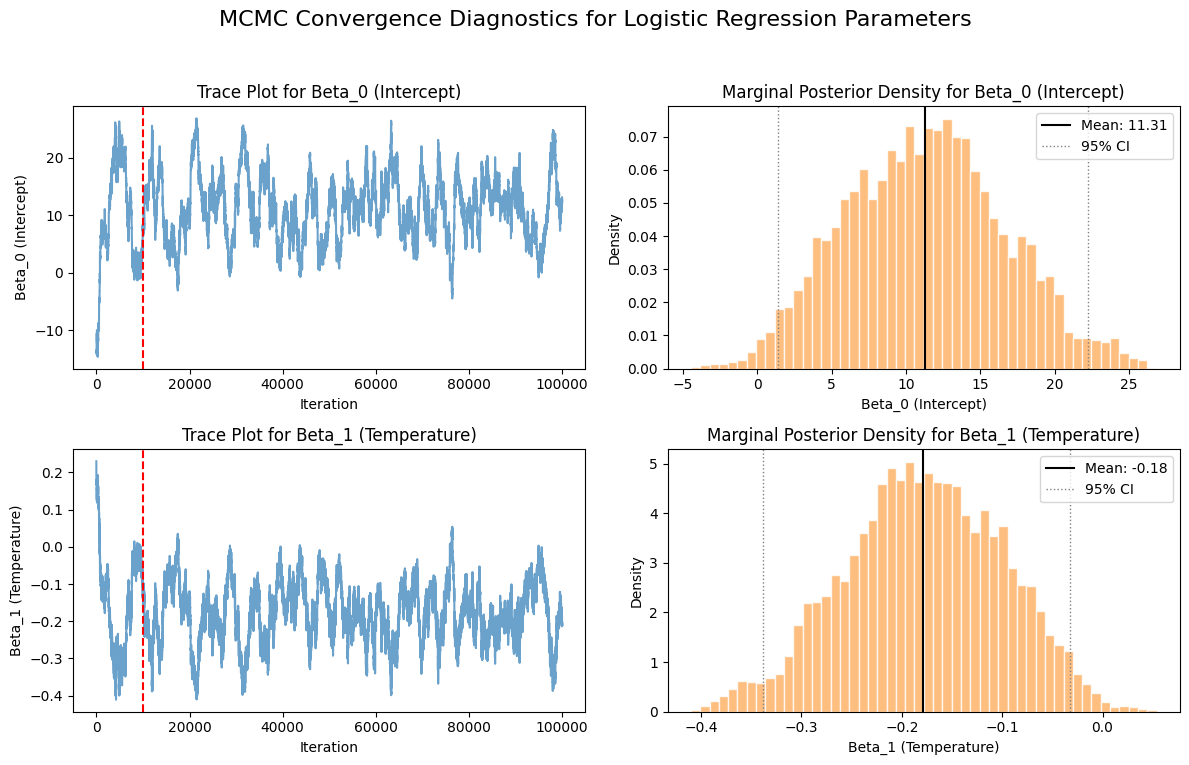


Visual Diagnostics Generated: Check the plots for convergence:
- Trace plots should look like random noise after the burn-in period.
- Density plots show the estimated distribution of the parameters.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# ----------------------------------------------------
# 1. DATA AND MODEL SETUP (Copied from previous step)
# ----------------------------------------------------
temperature = np.array([53, 57, 58, 63, 66, 67, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 81])
incidents = np.array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

X_temp = temperature
Y_incidents = incidents

# Inverse Logit function
def inverse_logit(eta):
    return 1 / (1 + np.exp(-eta))

# Log-Likelihood for Binary Logistic Regression
def log_likelihood(beta_0, beta_1, X, Y):
    eta = beta_0 + beta_1 * X
    p = inverse_logit(eta)
    return np.sum(Y * np.log(p) + (1 - Y) * np.log(1 - p))

# Log-Prior (Weakly Informative Normal Prior: N(0, 10))
def log_prior(beta_0, beta_1, prior_std=10):
    log_p0 = norm.logpdf(beta_0, loc=0, scale=prior_std)
    log_p1 = norm.logpdf(beta_1, loc=0, scale=prior_std)
    return log_p0 + log_p1

# Log-Posterior (unnormalized)
def log_posterior(beta_0, beta_1, X, Y, prior_std=10):
    return log_likelihood(beta_0, beta_1, X, Y) + log_prior(beta_0, beta_1, prior_std)

# ----------------------------------------------------
# 2. METROPOLIS-HASTINGS MCMC ALGORITHM EXECUTION
# ----------------------------------------------------

N_ITERATIONS = 100000
BURN_IN = 10000
PROPOSAL_STD = np.array([0.5, 0.05])
prior_std = 10 # Standard deviation for the N(0, 10) prior

chain = np.zeros((N_ITERATIONS, 2))
# Starting near the MLE: Intercept ~ -14, Temp ~ 0.23
current_beta = np.array([-14.0, 0.23])
chain[0] = current_beta

# Proposal distribution (Normal distribution centered at current_beta)
def propose_beta(current_beta, std_dev):
    return current_beta + norm.rvs(loc=0, scale=std_dev)

accepted_count = 0
for i in range(1, N_ITERATIONS):
    # 1. Propose new beta
    proposed_beta = propose_beta(current_beta, PROPOSAL_STD)

    # 2. Calculate Log-Posterior for current and proposed
    current_log_post = log_posterior(current_beta[0], current_beta[1], X_temp, Y_incidents, prior_std)
    proposed_log_post = log_posterior(proposed_beta[0], proposed_beta[1], X_temp, Y_incidents, prior_std)

    # 3. Calculate acceptance probability (Log-Alpha)
    log_alpha = proposed_log_post - current_log_post

    # 4. Accept or Reject
    if np.log(np.random.rand()) < log_alpha:
        current_beta = proposed_beta
        accepted_count += 1

    chain[i] = current_beta

# Discard burn-in samples for analysis
posterior_samples = chain[BURN_IN:]
acceptance_rate = accepted_count / N_ITERATIONS
print(f"MCMC Run Complete. Acceptance Rate: {acceptance_rate:.2f}")

# ----------------------------------------------------
# 3. VISUAL DIAGNOSTICS (Trace and Density Plots)
# ----------------------------------------------------

def plot_diagnostics(chain, burn_in, param_names):
    """
    Generates trace plots and marginal posterior density plots for MCMC results.
    """
    n_params = chain.shape[1]
    
    # Set up the figure for a 2x2 grid
    fig, axes = plt.subplots(n_params, 2, figsize=(12, 8))
    fig.suptitle('MCMC Convergence Diagnostics for Logistic Regression Parameters', fontsize=16)

    for i in range(n_params):
        param_chain = chain[:, i]
        param_posterior = param_chain[burn_in:]
        param_name = param_names[i]
        
        # --- Column 1: Trace Plots ---
        axes[i, 0].plot(param_chain, color='#2c7bb6', alpha=0.7)
        axes[i, 0].axvline(burn_in, color='red', linestyle='--', label='Burn-in End')
        axes[i, 0].set_title(f'Trace Plot for {param_name}')
        axes[i, 0].set_xlabel('Iteration')
        axes[i, 0].set_ylabel(param_name)
        
        # --- Column 2: Marginal Posterior Density Plots (Histograms) ---
        # Use more bins for smoother distribution
        axes[i, 1].hist(param_posterior, bins=50, density=True, color='#fdae61', edgecolor='white', alpha=0.8)
        
        # Optionally add mean and credible interval lines
        mean_val = np.mean(param_posterior)
        ci_low, ci_high = np.percentile(param_posterior, [2.5, 97.5])
        
        axes[i, 1].axvline(mean_val, color='black', linestyle='-', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
        axes[i, 1].axvline(ci_low, color='gray', linestyle=':', linewidth=1)
        axes[i, 1].axvline(ci_high, color='gray', linestyle=':', linewidth=1, label='95% CI')
        
        axes[i, 1].set_title(f'Marginal Posterior Density for {param_name}')
        axes[i, 1].set_xlabel(param_name)
        axes[i, 1].set_ylabel('Density')
        axes[i, 1].legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
    plt.show()

# Run the plotting function
plot_diagnostics(chain, BURN_IN, param_names=['Beta_0 (Intercept)', 'Beta_1 (Temperature)'])

print("\nVisual Diagnostics Generated: Check the plots for convergence:")
print("- Trace plots should look like random noise after the burn-in period.")
print("- Density plots show the estimated distribution of the parameters.")


## Sources

- [Monte Carlo Statistical Methods (George Casella slides) - accessed 22/10/2025](https://archived.stat.ufl.edu/casella/MCSM10/MCSMshortcourse09.pdf)
- Robert, Christian P. and George Casella. Monte Carlo statistical methods. New York: Springer, 2004.